In [1]:
from igraph import *
import igraph as ig
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

### Q1(a)(b) Load Network A and Network A Sample

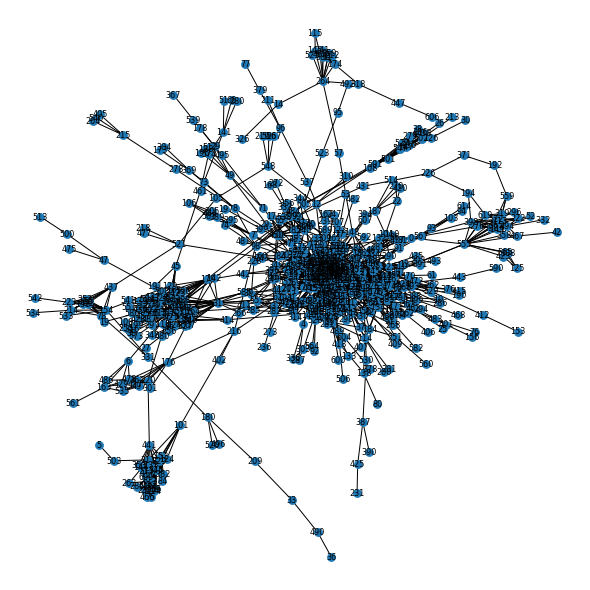

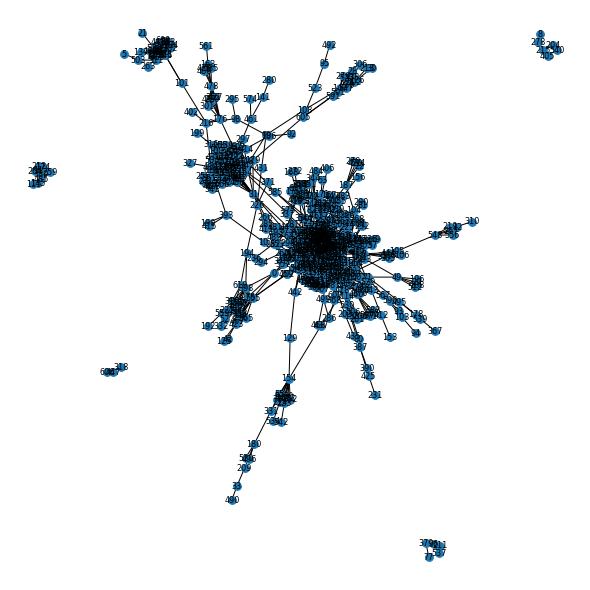

In [2]:
df_node = pd.read_csv(r'C:\Users\Joyce Huang\Downloads\fb-pages-food\node.csv')
df_edge = pd.read_csv(r'C:\Users\Joyce Huang\Downloads\fb-pages-food\edge.csv')

#display(df_node.head())
#display(df_edge.head())
#print(len(df_node))

# Network A
G = nx.from_pandas_edgelist(df_edge, 'node_a', 'node_b')
#print(G.edges(data=True))
plt.figure(3,figsize=(8,8)) 
nx.draw(G, with_labels=True, node_size=60,font_size=8)
plt.show()

# Network A Sample
from random import sample
import os
import random

random_nodes = sample(list(G.nodes()), 310)
G1 = nx.Graph()
G1.add_nodes_from(random_nodes)
#print(random_nodes)

df_edge_a = df_edge[df_edge['node_a'].isin(random_nodes)]
df_edge_b = df_edge[df_edge['node_b'].isin(random_nodes)]

frames = [df_edge_a, df_edge_b]  
result = pd.concat(frames)
#display(result)

G1 = nx.from_pandas_edgelist(result, 'node_a', 'node_b')

plt.figure(3,figsize=(8,8)) 
nx.draw(G1, with_labels=True, node_size=60,font_size=8)
plt.show()

### Q1(c) Graph-level metrics

In [3]:
print('----------------------------- Average-Degree ---------------------------------','\n')
print('network A', nx.info(G),'\n')
print('network A Sample', nx.info(G1),'\n')

print('------- Diameter-Of-The-Largest-Component / Average-Shortest-Path-------------','\n')
components = nx.connected_components(G)
largest_component = max(components, key=len)
subgraph = G.subgraph(largest_component)
diameter = nx.diameter(subgraph)
avg_path = nx.average_shortest_path_length(subgraph)
print("Network A diameter of largest component:", diameter)
print("Network A average shortest path of largest component:", avg_path)

components = nx.connected_components(G1)
largest_component = max(components, key=len)
subgraph = G1.subgraph(largest_component)
diameter = nx.diameter(subgraph)
avg_path = nx.average_shortest_path_length(subgraph)
print("Network A Sample diameter of largest component:", diameter)
print("Network A Sample average shortest path of largest component:", avg_path,'\n')

print('-----------------------Average-Clustering-Coefficient-------------------------','\n')
global_cluster = nx.average_clustering(G)
print('Network A average clustering coefficient:', global_cluster)
global_cluster = nx.average_clustering(G1)
print('Network A Sample average clustering coefficient:', global_cluster,'\n')

# print('------------------------------ Transitivity-----------------------------------','\n')
# global_cluster = nx.transitivity(G)
# print('Network A transitivity:', global_cluster)
# global_cluster = nx.transitivity(G1)
# print('Network Sample A transitivity:', global_cluster,'\n')

----------------------------- Average-Degree --------------------------------- 

network A Name: 
Type: Graph
Number of nodes: 620
Number of edges: 2102
Average degree:   6.7806 

network A Sample Name: 
Type: Graph
Number of nodes: 577
Number of edges: 1584
Average degree:   5.4905 

------- Diameter-Of-The-Largest-Component / Average-Shortest-Path------------- 

Network A diameter of largest component: 17
Network A average shortest path of largest component: 5.088696649121893
Network A Sample diameter of largest component: 19
Network A Sample average shortest path of largest component: 5.44199998694355 

-----------------------Average-Clustering-Coefficient------------------------- 

Network A average clustering coefficient: 0.3308970263553271
Network A Sample average clustering coefficient: 0.25868924021310497 



### Q2(b) Node-level metrics

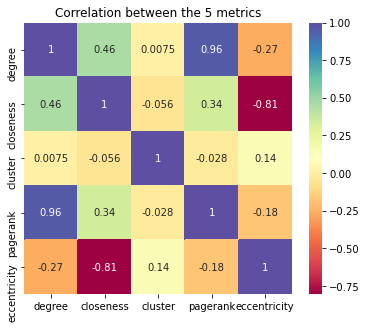

In [4]:
#Degree
degree = nx.degree(G)
degree = dict((x, y) for x, y in degree)
#print(degree)

# Closeness
closeness = nx.closeness_centrality(G)
#print(closeness)

# Clustering coefficient
cluster_co = nx.clustering(G)
#print(cluster_co)

# Page Rank
pagerank = nx.pagerank(G)
#print(pagerank)

# Eccentricity
eccen = nx.eccentricity(G)
#print(eccen)

list = [degree, closeness, cluster_co, pagerank, eccen]
df = pd.DataFrame(list)
df = df.T
df.columns = ['degree','closeness', 'cluster', 'pagerank', 'eccentricity']
df

fig, ax = plt.subplots(figsize=(6, 5))
corr_matrix = df.corr()
sn.heatmap(corr_matrix, annot=True, cmap='Spectral')
plt.title('Correlation between the 5 metrics')
plt.show()

### Q3(a) Network Random

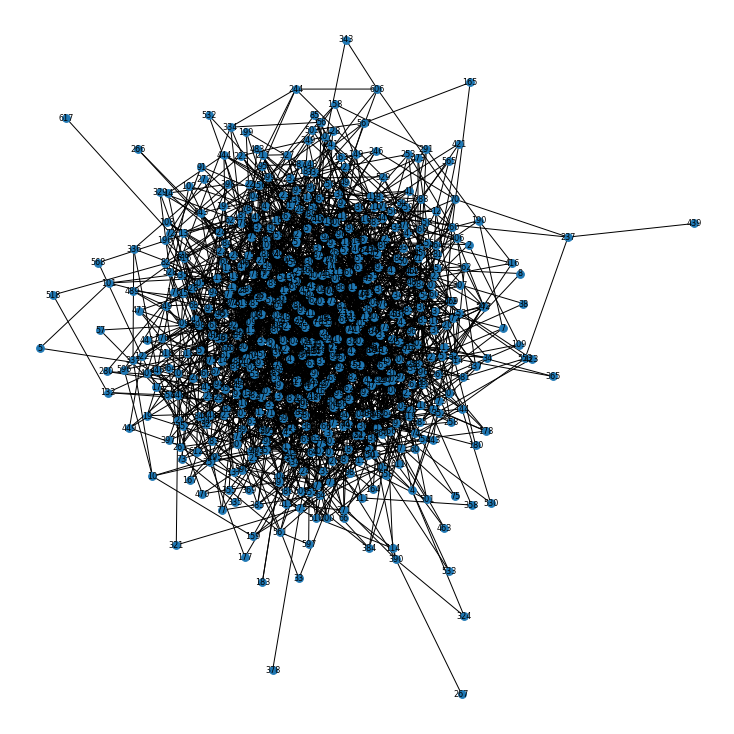

----------------------------- Average-Degree --------------------------------- 

network Random Name: 
Type: Graph
Number of nodes: 620
Number of edges: 2102
Average degree:   6.7806 

------- Diameter-Of-The-Largest-Component / Average-Shortest-Path------------- 

Network Random diameter of largest component: 7
Network Random average shortest path length of largest component: 3.5776486528740423 

-----------------------Average-Clustering-Coefficient------------------------- 

Network Random clustering coefficient: 0.010348244945019125 

Degree of freedom = 2
p value: 0.8102999380065492
ACCEPT NULL HYPOTHESIS


In [5]:
G2 = nx.gnm_random_graph(620, 2102, seed=None, directed=False)
plt.figure(3,figsize=(10,10)) 
nx.draw(G2, with_labels=True, node_size=60,font_size=8)
plt.show()

#Graph level metrics
print('----------------------------- Average-Degree ---------------------------------','\n')
print('network Random', nx.info(G2),'\n')

print('------- Diameter-Of-The-Largest-Component / Average-Shortest-Path-------------','\n')
components = nx.connected_components(G2)
largest_component = max(components, key=len)
subgraph = G2.subgraph(largest_component)
diameter = nx.diameter(subgraph)
avg_path = nx.average_shortest_path_length(subgraph)
print("Network Random diameter of largest component:", diameter)
print("Network Random average shortest path length of largest component:", avg_path,'\n')

print('-----------------------Average-Clustering-Coefficient-------------------------','\n')
global_cluster = nx.average_clustering(G2)
print('Network Random clustering coefficient:', global_cluster,'\n')


# Chi-square independence test
from scipy.stats import chi2_contingency 

info = [
[6.7806,0.33,5.09],
[6.7806,0.01,3.57]
]

stat, p, dof, expected = chi2_contingency(info) 

print('Degree of freedom = {}'.format(dof))
 
significance_level = 0.05
print("p value: " + str(p)) 
if p <= significance_level: 
    print('Reject NULL HYPOTHESIS') 
else: 
    print('ACCEPT NULL HYPOTHESIS')

,degree,closeness,cluster,pagerank,eccentricity
0,6.0,0.282778,0.0,0.001437,5.0
1,6.0,0.284075,0.0,0.001426,5.0
2,4.0,0.267271,0.0,0.001056,6.0
3,7.0,0.286309,0.0,0.001665,5.0
4,7.0,0.271491,0.0,0.001848,6.0
...,...,...,...,...,...
615,6.0,0.281236,0.0,0.001432,6.0
616,7.0,0.278202,0.0,0.001764,6.0
617,1.0,0.208558,0.0,0.000516,7.0
618,7.0,0.284729,0.0,0.001662,6.0


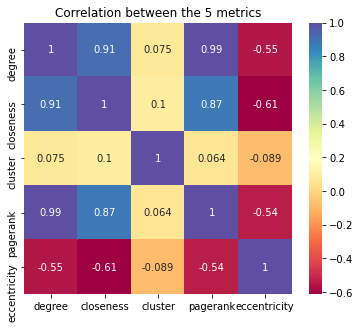

,degree,closeness,cluster,pagerank,eccentricity
count,620.000000,620.000000,620.000000,620.000000,620.000000
mean,6.780645,0.207296,0.330897,0.001613,12.520968
std,9.476795,0.045011,0.332693,0.001652,1.669225
min,1.000000,0.081372,0.000000,0.000375,9.000000
25%,2.000000,0.171421,0.000000,0.000718,11.000000
50%,4.000000,0.206471,0.277222,0.001206,12.000000
75%,8.000000,0.248994,0.533929,0.001947,14.000000
max,134.000000,0.331370,1.000000,0.025287,17.000000


,degree,closeness,cluster,pagerank,eccentricity
count,620.000000,620.000000,620.000000,620.000000,620.000000
mean,6.780645,0.280833,0.010348,0.001613,5.550000
std,2.616639,0.018667,0.024075,0.000519,0.529349
min,1.000000,0.195515,0.000000,0.000483,5.000000
25%,5.000000,0.270306,0.000000,0.001247,5.000000
50%,7.000000,0.282391,0.000000,0.001612,6.000000
75%,8.000000,0.293365,0.000000,0.001956,6.000000
max,15.000000,0.330486,0.166667,0.003259,7.000000


In [6]:
#Degree
degree_2 = nx.degree(G2)
degree_2 = dict((x, y) for x, y in degree_2)

# Closeness
closeness_2 = nx.closeness_centrality(G2)

# Clustering coefficient
cluster_co_2 = nx.clustering(G2)

# Page Rank
pagerank_2 = nx.pagerank(G2)

# Eccentricity
eccen_2 = nx.eccentricity(G2)

list2 = [degree_2, closeness_2, cluster_co_2, pagerank_2, eccen_2]
df2 = pd.DataFrame(list2)
df2 = df2.T
df2.columns = ['degree','closeness', 'cluster', 'pagerank', 'eccentricity']
display(df2)

fig, ax = plt.subplots(figsize=(6, 5))
corr_matrix = df2.corr()
sn.heatmap(corr_matrix, annot=True, cmap='Spectral')
plt.title('Correlation between the 5 metrics')
plt.show()

display(df.describe())
display(df2.describe())

In [7]:
import scipy.stats as stats
def mann_whitney_u_test(distribution_1, distribution_2):
    u_statistic, p_value = stats.mannwhitneyu(distribution_1, distribution_2)
    return u_statistic, p_value

#Perform the Mann-Whitney U Test on the two distributions
u_statistic, p_value = mann_whitney_u_test(df['degree'], df2['degree'])
significance_level = 0.05
print("Degree p-value: " + str(p_value)) 
if p_value <= significance_level: 
    print('Reject NULL HYPOTHESIS','\n') 
else: 
    print('ACCEPT NULL HYPOTHESIS','\n')
    
u_statistic, p_value = mann_whitney_u_test(df['closeness'], df2['closeness'])
significance_level = 0.05
print("Closeness p-value: " + str(p_value)) 
if p_value <= significance_level: 
    print('Reject NULL HYPOTHESIS','\n') 
else: 
    print('ACCEPT NULL HYPOTHESIS','\n')
    
u_statistic, p_value = mann_whitney_u_test(df['cluster'], df2['cluster'])
significance_level = 0.05
print("Cluster p-value: " + str(p_value)) 
if p_value <= significance_level: 
    print('Reject NULL HYPOTHESIS','\n') 
else: 
    print('ACCEPT NULL HYPOTHESIS','\n')
    
u_statistic, p_value = mann_whitney_u_test(df['pagerank'], df2['pagerank'])
significance_level = 0.05
print("Page Rank p-value: " + str(p_value)) 
if p_value <= significance_level: 
    print('Reject NULL HYPOTHESIS','\n') 
else: 
    print('ACCEPT NULL HYPOTHESIS','\n')

    u_statistic, p_value = mann_whitney_u_test(df['eccentricity'], df2['eccentricity'])
significance_level = 0.05
print("Eccentricity p-value: " + str(p_value)) 
if p_value <= significance_level: 
    print('Reject NULL HYPOTHESIS','\n') 
else: 
    print('ACCEPT NULL HYPOTHESIS','\n')

Degree p-value: 1.7285035636760085e-21
Reject NULL HYPOTHESIS 

Closeness p-value: 9.390718465393087e-161
Reject NULL HYPOTHESIS 

Cluster p-value: 5.0196979833311815e-84
Reject NULL HYPOTHESIS 

Page Rank p-value: 1.745498361002172e-13
Reject NULL HYPOTHESIS 

Eccentricity p-value: 1.745498361002172e-13
Reject NULL HYPOTHESIS 

